# Dataset과 Dataloader

 - root 는 학습/테스트 데이터가 저장되는 경로입니다.
 - train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
 - download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
 - transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.

In [45]:
# 데이터 샘플을 처리하는 코드는 지저분하고 유지보수가 어려울 수 있기 때문에 가독성과 모듈성을 위해서 학습 코드로부터 분리하는 것이 이상적.
# torch.utils.data.DataLoader, torch.utils.data.Dataset을 사용하면 가지고 있는 데이터를 사용할 수 있다.

import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [20]:
print(len(training_data))
print(torch.randint(len(training_data), size=(1,)))
training_data[1][0].shape

# traing_data에서 첫번째 차원에는 이미지 데이터셋이기 때문에 이미지 데이터 하나가 들어 있다. 뒤의 2번째 차원에는 0, 1 두 가지 idx만 들어있다.
# 2번째 차원에는 0은 이미지 데이터이고 1은 정답 레이블로 튜플 형태로 들어 있다.

60000
tensor([30646])


torch.Size([1, 28, 28])

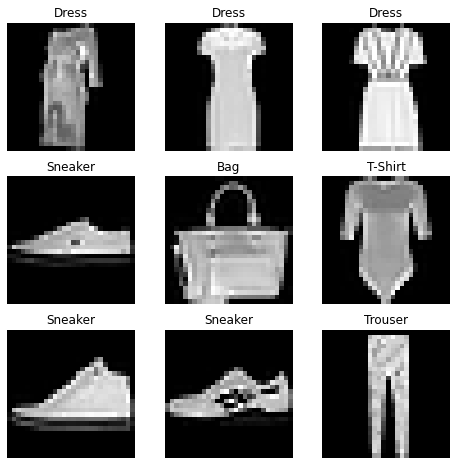

In [21]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# 파일에서 사용자 정의 데이터셋 만들기

In [22]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [31]:
next(iter(train_dataloader))[1]

tensor([5, 6, 6, 1, 3, 8, 5, 5, 6, 8, 8, 6, 3, 7, 1, 8, 0, 3, 2, 7, 3, 3, 9, 0,
        3, 2, 9, 0, 9, 3, 6, 8, 5, 0, 7, 6, 2, 6, 2, 8, 5, 5, 9, 0, 2, 5, 4, 3,
        0, 4, 3, 1, 1, 5, 8, 0, 6, 6, 3, 7, 3, 1, 1, 4])

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


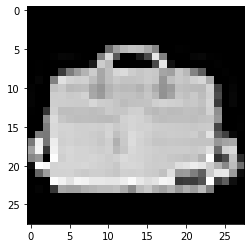

Label: 8


In [32]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [38]:
img.shape

torch.Size([28, 28])

# 변형(Transform)

In [39]:
# FashionMNIST 특징(feature)은 PIL Image 형식이며, 정답(label)은 정수(integer)입니다.
# 학습을 하려면 정규화(normalize)된 텐서 형태의 특징(feature)과 원-핫(one-hot)으로 부호화(encode)된 텐서 형태의 정답(label)이 필요합니다.
# 이러한 변형(transformation)을 하기 위해 ToTensor 와 Lambda 를 사용합니다.

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [42]:
data, label = ds[0]
print(data)
print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [46]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [47]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [49]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3])


In [50]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [51]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [53]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [54]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2191, -0.1477,  0.1461,  0.5109,  0.6014, -0.0131, -0.0713,  0.0075,
          0.1132, -0.4719,  0.4214,  0.3324,  0.1762, -0.2503,  0.2850,  0.1947,
         -0.1783,  0.5033,  0.2824,  0.3483],
        [-0.0024,  0.2085,  0.6580,  0.3201,  0.4009,  0.1223,  0.2365,  0.0206,
          0.2490, -0.5813,  0.3338,  0.4211,  0.0492, -0.2464,  0.3072, -0.0425,
          0.1250,  0.0987,  0.6437,  0.2624],
        [ 0.0046, -0.1356,  0.8233,  0.3209,  0.5141,  0.1694,  0.4046, -0.1703,
          0.5127, -0.3860,  0.3662,  0.5814,  0.0932, -0.2024, -0.1067, -0.0322,
          0.1632,  0.3013,  0.4683, -0.0497]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2191, 0.0000, 0.1461, 0.5109, 0.6014, 0.0000, 0.0000, 0.0075, 0.1132,
         0.0000, 0.4214, 0.3324, 0.1762, 0.0000, 0.2850, 0.1947, 0.0000, 0.5033,
         0.2824, 0.3483],
        [0.0000, 0.2085, 0.6580, 0.3201, 0.4009, 0.1223, 0.2365, 0.0206, 0.2490,
         0.0000, 0.3338, 0.4211, 0.0492, 0.0000, 0.30

In [55]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [56]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [57]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0028,  0.0136,  0.0139,  ...,  0.0089,  0.0129, -0.0078],
        [-0.0090,  0.0237, -0.0085,  ...,  0.0020, -0.0070, -0.0064]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0046, -0.0225], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0375, -0.0399,  0.0166,  ..., -0.0179, -0.0268, -0.0398],
        [-0.0186,  0.0320,  0.0095,  ..., -0.0320,  0.0399, -0.0031]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 